<a href="https://colab.research.google.com/github/lordnixus/lord-of-the-rings/blob/main/lotr_selenium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install selenium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 87.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.9/384.9 KB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 KB 8.6 MB/s eta 0:00:00


In [2]:
%%shell

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

Executing: /tmp/apt-key-gpghome.MnYMTFTeQ9/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: public key "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.benGFgiNxf/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: public key "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.SIjhPiv6WN/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: public key "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1


In [3]:
!apt-get update
!apt-get install chromium chromium-driver

Get:1 http://deb.debian.org/debian buster InRelease [122 kB]
Get:2 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:3 http://deb.debian.org/debian buster-updates InRelease [56.6 kB]
Get:4 http://deb.debian.org/debian-security buster/updates InRelease [34.8 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Get:7 http://deb.debian.org/debian buster/main amd64 Packages [10.7 MB]
Hit:8 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:10 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:11 http://deb.debian.org/debian buster-updates/main amd64 Packages [9,745 B]
Get:12 http://deb.debian.org/debian-security buster/updates/main amd64 Packages [606 kB]
Hit:13 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:14 http://pp

In [4]:
def webdriver():
    options = webdriver.ChromeOptions()
    options.add_argument("--verbose")
    options.add_argument('--no-sandbox')
    options.add_argument('--headless')
    options.add_argument('--disable-gpu')
    options.add_argument("--window-size=1920, 1200")
    options.add_argument('--disable-dev-shm-usage')
    driver = webdriver.Chrome(options=options)
    return driver

In [5]:
!pip install webdriver_manager

import pandas as pd
import time
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

page_url = "https://lotr.fandom.com/wiki/Category:Characters" 
options = Options()
options.add_argument("--headless")
options.add_argument("--no-sandbox")

options.headless = True

driver = webdriver.Chrome("/usr/bin/chromedriver", options=options)

<ipython-input-6-886c6bf868b5>:9: DeprecationWarning: headless property is deprecated, instead use add_argument('--headless') or add_argument('--headless=new')
  options.headless = True
<ipython-input-6-886c6bf868b5>:11: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("/usr/bin/chromedriver", options=options)


In [7]:
driver.get(page_url)

from selenium.webdriver.common.by import By

categories = driver.find_elements(By.CLASS_NAME, "category-page__member-link")

In [8]:
categories

[<selenium.webdriver.remote.webelement.WebElement (session="5cf9142a6dd80ed8f498c8620533edd8", element="f2bc34e1-e230-47b0-8af2-aa9e492ac76f")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5cf9142a6dd80ed8f498c8620533edd8", element="112dec82-1b8a-4678-ab12-0fb1db0b4889")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5cf9142a6dd80ed8f498c8620533edd8", element="ecce821c-7f71-4d50-a872-6d383afbe6b4")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5cf9142a6dd80ed8f498c8620533edd8", element="d0924da8-8df6-4c92-b6c8-5b634641c1c2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5cf9142a6dd80ed8f498c8620533edd8", element="9b1e2044-2c5a-4e93-b5eb-b87b2db0ffa7")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5cf9142a6dd80ed8f498c8620533edd8", element="011a675a-4fec-432d-9a6f-35f7db1dcc77")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5cf9142a6dd80ed8f498c8620533edd8", element="c03e8bab-3871-46e0-bc65-f9

In [9]:
categories[0].text

'Category:CGI characters'

In [10]:
categories[0].get_attribute("href")

'https://lotr.fandom.com/wiki/Category:CGI_characters'

In [11]:
driver.get(categories[0].get_attribute("href"))

In [12]:
character_names = driver.find_elements(By.CLASS_NAME, "category-page__member-link")

In [13]:
character_names[6].text

'Great Goblin'

In [14]:
import pandas as pd
import time
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

# create driver 
options = Options()
options.add_argument("--headless")
options.add_argument("--no-sandbox")

options.headless = True

driver = webdriver.Chrome("/usr/bin/chromedriver", options=options)

# go to the characters
page_url = "https://lotr.fandom.com/wiki/Category:Characters"
driver.get(page_url)

# give some time for the page to get loaded fully
time.sleep(5)

# find categories on the page
from selenium.webdriver.common.by import By

story_categories = driver.find_elements(By.CLASS_NAME, "category-page__member-link")

categories = []

for category in story_categories:
    category_url = category.get_attribute("href")
    category_name = category.text
    categories.append({"category_name": category_name, "url": category_url})

<ipython-input-14-e74f92928024>:11: DeprecationWarning: headless property is deprecated, instead use add_argument('--headless') or add_argument('--headless=new')
  options.headless = True
<ipython-input-14-e74f92928024>:13: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("/usr/bin/chromedriver", options=options)


In [15]:
categories

[{'category_name': 'Category:CGI characters',
  'url': 'https://lotr.fandom.com/wiki/Category:CGI_characters'},
 {'category_name': 'Category:Characters by race',
  'url': 'https://lotr.fandom.com/wiki/Category:Characters_by_race'},
 {'category_name': 'Category:Characters in Beren and Lúthien',
  'url': 'https://lotr.fandom.com/wiki/Category:Characters_in_Beren_and_L%C3%BAthien'},
 {'category_name': 'Category:Characters in Born of Hope',
  'url': 'https://lotr.fandom.com/wiki/Category:Characters_in_Born_of_Hope'},
 {'category_name': "Category:Characters in Morgoth's Ring",
  'url': 'https://lotr.fandom.com/wiki/Category:Characters_in_Morgoth%27s_Ring'},
 {'category_name': 'Category:Characters in The Book of Lost Tales',
  'url': 'https://lotr.fandom.com/wiki/Category:Characters_in_The_Book_of_Lost_Tales'},
 {'category_name': 'Category:Characters in The Children of Húrin',
  'url': 'https://lotr.fandom.com/wiki/Category:Characters_in_The_Children_of_H%C3%BArin'},
 {'category_name': 'Cate

In [16]:
character_list = []

for chapter in categories:
    driver.get(chapter["url"])
    
    char_elements = driver.find_elements(By.CLASS_NAME, "category-page__member-link")
    
    for element in char_elements:
        character_list.append({"chapter": chapter["category_name"], "character": element.text})

In [17]:
character_list

[{'chapter': 'Category:CGI characters', 'character': 'Beechbone'},
 {'chapter': 'Category:CGI characters', 'character': 'Bregalad'},
 {'chapter': 'Category:CGI characters', 'character': "Durin's Bane"},
 {'chapter': 'Category:CGI characters', 'character': 'Finglas'},
 {'chapter': 'Category:CGI characters', 'character': 'Fladrif'},
 {'chapter': 'Category:CGI characters', 'character': 'Gollum'},
 {'chapter': 'Category:CGI characters', 'character': 'Great Goblin'},
 {'chapter': 'Category:CGI characters', 'character': 'Lindenroot'},
 {'chapter': 'Category:CGI characters',
  'character': 'Category:Non-canonical Creatures'},
 {'chapter': 'Category:CGI characters',
  'character': 'Category:Non-canonical Ents'},
 {'chapter': 'Category:CGI characters',
  'character': 'Category:Non-canonical Trolls'},
 {'chapter': 'Category:CGI characters', 'character': 'Rootcouncil'},
 {'chapter': 'Category:CGI characters', 'character': 'Shelob'},
 {'chapter': 'Category:CGI characters', 'character': 'Smaug'},
 

In [18]:
pd.DataFrame(character_list)

,chapter,character
0,Category:CGI characters,Beechbone
1,Category:CGI characters,Bregalad
2,Category:CGI characters,Durin's Bane
3,Category:CGI characters,Finglas
4,Category:CGI characters,Fladrif
...,...,...
1786,Category:Villains,Ungoliant
1787,Category:Villains,Wargs
1788,Category:Villains,Witch-king of Angmar
1789,Category:Villains,Gríma Wormtongue


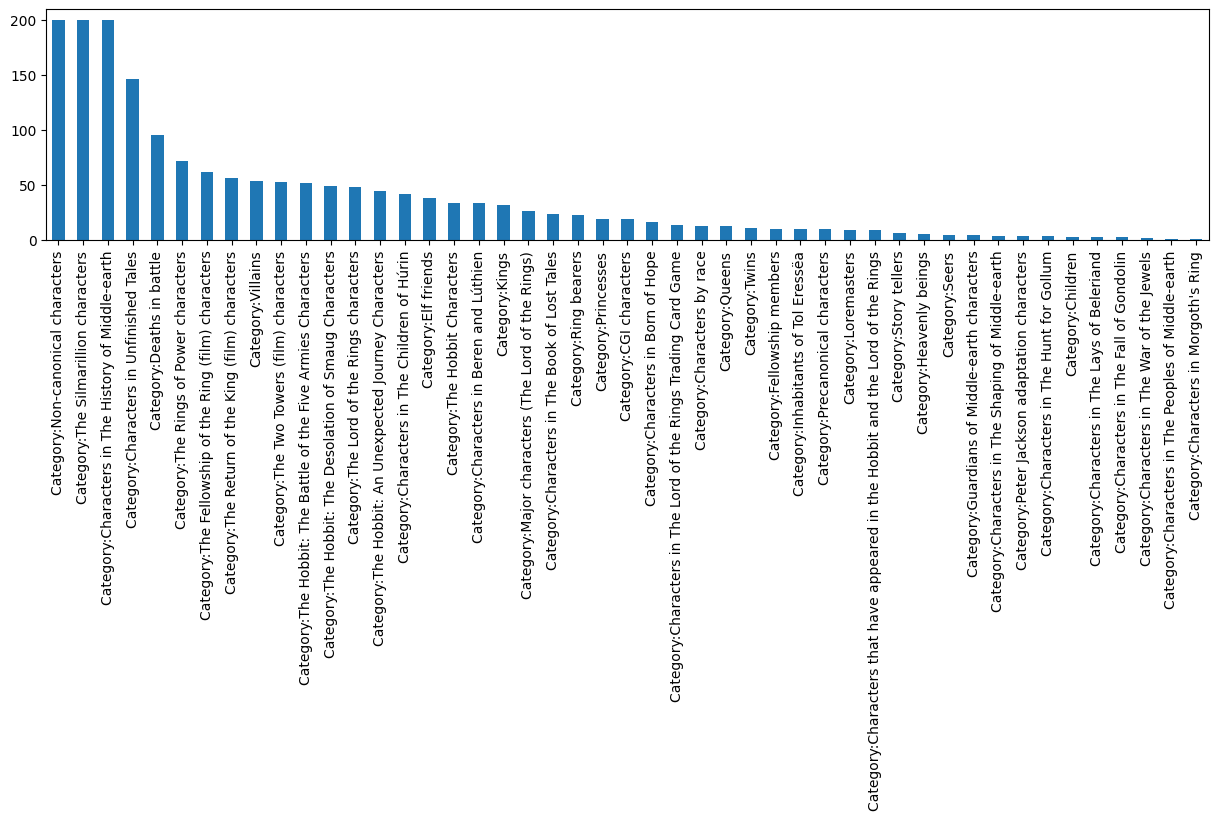

In [30]:
%matplotlib inline

import matplotlib.pyplot as plt

character_df = pd.DataFrame(character_list)
plt.figure(figsize=(15,3))
character_df["chapter"].value_counts().plot(kind = "bar")
plt.show()